<a href="https://colab.research.google.com/github/M-Sethupathy/Shala2020/blob/master/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Assignment - 2: Basic Data Understanding**

---

This assignment will get you familiarized with Python libraries and  functions required for data visualization.

---
## Part 1 - Loading data 
---

###Import the following libraries:  

* ```numpy``` with an alias name ```np```, 
* ```pandas``` with an alias name ```pd```, 
* ```matplotlib.pyplot``` with an alias name ```plt```, and 
* ```seaborn``` with an alias name ```sns```. 

In [0]:
# Load the four libraries with their aliases 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Using the files ```train.csv``` and ```moviesData.csv```,  peform the following:

* Load these file as ```pandas``` dataframes and store it in variables named ```df``` and ```movies``` respectively. 
* Print the first ten rows of ```df```. 



In [0]:
# Load the file as a dataframe 
df = pd.read_csv('train.csv')
movies = pd.read_csv('movies.csv')

In [242]:
# Print the first ten rows of df
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID,MonthRateNew
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0,0.743111
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1,1.513549
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2,-1.681613
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3,1.265442
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4,0.339014
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,No,13,3,3,0,8,2,2,7,7,3,6,5,-0.337745
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Yes,20,4,1,3,12,3,2,1,0,0,0,6,-0.607427
7,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,No,22,4,2,1,1,2,3,1,0,0,0,7,-0.128955
8,38,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,No,21,4,2,0,10,2,3,9,7,1,8,8,-0.774488
9,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,No,13,3,2,2,17,3,2,7,7,7,7,9,0.331207


### Using the dataframe ```df```, perform the following: 

* Print the first five rows of the column ```MonthlyRate```. 
* Find out the details of the column ```MonthlyRate``` like mean, maximum value, minimum value, etc. 

In [243]:
# Print the first five rows of MonthlyRate
df['MonthlyRate'].head(5)

0    19479
1    24907
2     2396
3    23159
4    16632
Name: MonthlyRate, dtype: int64

In [244]:
# Find the details of MonthlyRate 
print(df['MonthlyRate'].describe())

count     1028.000000
mean     14243.531128
std       7048.768076
min       2094.000000
25%       8259.750000
50%      14074.500000
75%      20342.250000
max      26999.000000
Name: MonthlyRate, dtype: float64


---
## Part 2 - Cleaning and manipulating data 
---

### Using the dataframe ```df```, peform the following:

* Check whether there are any missing values in ```df```. 
* If yes, drop those values and print the size of ```df``` after dropping these. 

In [245]:
# Check for missing values 
con1 = df.isna().any().sum()
print(con1)

# Drop the missing values 
if con1 != 0:
  df = df.dropna()

# Print the size of df after dropping 
df.shape


0


(1028, 35)

### Using the dataframe ```df```, peform the following:

* Add another column named ```MonthRateNew``` in ```df``` by subtracting the mean from ```MonthlyRate``` and dividing it by standard deviation. 

In [246]:
# Add a column named MonthRateNew 
df['MonthRateNew'] = pd.Series((df['MonthlyRate']-df['MonthlyRate'].mean())/np.std(df['MonthlyRate']))
df['MonthRateNew']


0       0.743111
1       1.513549
2      -1.681613
3       1.265442
4       0.339014
          ...   
1023   -0.532200
1024    1.768470
1025    0.137320
1026    1.291559
1027   -1.495390
Name: MonthRateNew, Length: 1028, dtype: float64

### Using the dataframe ```movies```, perform the following: 

* Check whether there are any missing values in ```movies```. 
* Find out the number of observations/rows having any of their features/columns missing. 
* Drop the missing values and print the size of ```movies``` after dropping these. 
* Instead of dropping the missing values, replace the missing values by their mean (or some suitable value). 


In [247]:
# Check for missing values 
con2 = movies.isna().any().sum()
print(con2)
# Drop the missing values 
if con2 != 0:
  movies1 = movies.dropna()
  movies1.shape
# Replace the missing values 
movies.fillna(movies.mean())
# You can use SimpleImputer of sklearn for this



11


,Unnamed: 0,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,dvd_rel_month,dvd_rel_day,imdb_rating,imdb_num_votes,critics_rating,critics_score,audience_rating,audience_score,best_pic_nom,best_pic_win,best_actor_win,best_actress_win,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5
0,1,Filly Brown,Feature Film,Drama,80.0,R,Indomina Media Inc.,2013,4,19,2013.0,7.0,30.0,5.5,899,Rotten,45,Upright,73,no,no,no,no,no,no,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria
1,2,The Dish,Feature Film,Drama,101.0,PG-13,Warner Bros. Pictures,2001,3,14,2001.0,8.0,28.0,7.3,12285,Certified Fresh,96,Upright,81,no,no,no,no,no,no,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy
2,3,Waiting for Guffman,Feature Film,Comedy,84.0,R,Sony Pictures Classics,1996,8,21,2001.0,8.0,21.0,7.6,22381,Certified Fresh,91,Upright,91,no,no,no,no,no,no,Christopher Guest,Christopher Guest,Catherine O'Hara,Parker Posey,Eugene Levy,Bob Balaban
3,4,The Age of Innocence,Feature Film,Drama,139.0,PG,Columbia Pictures,1993,10,1,2001.0,11.0,6.0,7.2,35096,Certified Fresh,80,Upright,76,no,no,yes,no,yes,no,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen
4,5,Malevolence,Feature Film,Horror,90.0,R,Anchor Bay Entertainment,2004,9,10,2005.0,4.0,19.0,5.1,2386,Rotten,33,Spilled,27,no,no,no,no,no,no,Stevan Mena,Samantha Dark,R. Brandon Johnson,Brandon Johnson,Heather Magee,Richard Glover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,596,Death Defying Acts,Feature Film,Drama,97.0,PG,Genius Productions,2008,7,11,2008.0,10.0,28.0,5.9,8345,Rotten,44,Spilled,26,no,no,no,no,no,no,Gillian Armstrong,Guy Pearce,Catherine Zeta-Jones,Timothy Spall,Saoirse Ronan,Jack Bailey
596,597,Half Baked,Feature Film,Comedy,82.0,R,Universal Pictures,1998,1,16,1998.0,6.0,30.0,6.7,46794,Rotten,29,Upright,81,no,no,no,no,no,no,Tamra Davis,Dave Chappelle,Guillermo Diaz,Jim Breuer,Harland Williams,Rachel True
597,598,Dance of the Dead,Feature Film,Action & Adventure,87.0,R,Grindhouse Entertainment,2008,3,9,2008.0,10.0,14.0,5.9,10087,Fresh,80,Spilled,52,no,no,no,no,no,no,Gregg Bishop,Jared Kusnitz,Greyson Chadwick,Chandler Darby,Carissa Capobianco,Randy McDowell
598,599,Around the World in 80 Days,Feature Film,Action & Adventure,120.0,PG,Buena Vista Pictures,2004,6,16,2004.0,11.0,2.0,5.8,66054,Rotten,31,Spilled,34,no,no,no,no,no,yes,Frank Coraci,Jackie Chan,Steve Coogan,Ewen Bremner,Robert Fyfe,Ian McNeice


---
## Part 3 - Visualizing data 
---

### Visualize the ```df``` by drawing the following plots:

* Plot a histogram of ```Age``` and find the range in which most people are there. 
* Modify the histogram of ```Age``` by adding 30 bins. 
* Draw a scatter plot between ```Age``` and ```Attrition``` and suitable labels to the axes. Find out whether people more than 50 years are more likely to leave the company. (```Attrition``` = 1 means people have left the company). 

Age Column's range lies between  30.0  to  43.0
Probability of 50 years old more likely to leave company :  12.07 %


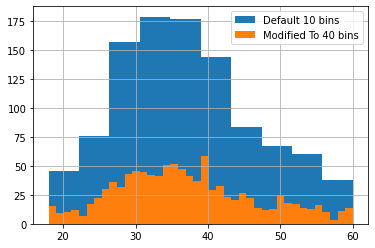

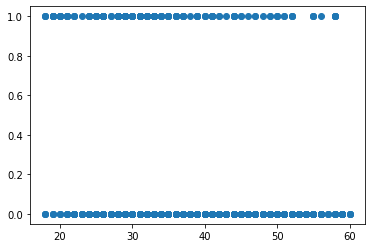

In [269]:
# Plot and modify the histogram of Age
df['Age'].hist(label='Default 10 bins')
# print(df['Age'].mode())
# print(df.Age.describe())

q1 = df['Age'].quantile(q=0.25)
q3 = df['Age'].quantile(q=0.75)
print('Age Column\'s range lies between ',q1,' to ',q3)

df['Age'].hist(bins=40,label='Modified To 40 bins')
plt.legend()

# Draw a scatter plot between Age and Attrition
# df.plot(kind='scatter',x=df['Attrition'],y=df['Age'])
graph1 = plt.figure()
graph1 = graph1.add_subplot('111')
graph1.scatter(df['Age'],df['Attrition'])

deptdata = df[df['Age'] > 50]
# print('hello',deptdata)
leftcount = deptdata[deptdata['Attrition'] == 1].shape[0]
keepcount = deptdata[deptdata['Attrition'] == 0].shape[0]

print('Probability of 50 years old more likely to leave company : ',round(100*(leftcount/(leftcount+keepcount)),2),'%')
# print(leftcount)
# print(keepcount)

### Visualize the ```df``` by following the steps given below:

* Get a series containing counts of unique values of ```Attrition```.
* Draw a countplot for ```Attrition``` using ```sns.countplot()```. 

0    0.832685
1    0.167315
Name: Attrition, dtype: float64


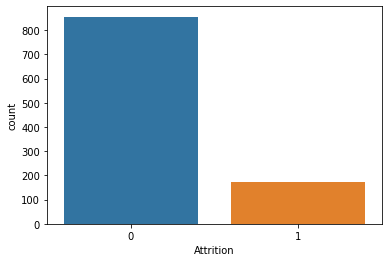

In [249]:
# Get a series of counts of values of Attrition
print(df['Attrition'].value_counts(normalize=True))

# Draw a countplot for Attrition 
# You may use countplot of seaborn for this 
sns.countplot(df['Attrition'])


### Visualize the ```df``` by following the steps given below:

* Draw a cross tabulation of ```Attrition``` and ```BusinessTravel``` as bar charts. Find which value of ```BusinessTravel``` has highest number of people.

BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely   All
Attrition                                                         
0                       92                150            614   856
1                       10                 47            115   172
All                    102                197            729  1028
Travel_Rarely  has highest number of people with value of  [729]


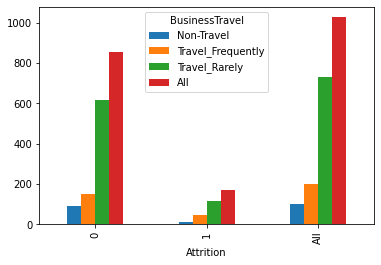

In [250]:
# Draw a cross tab of Attritiona and BusinessTravel 
# You may use crosstab of pandas for this 

crosstable1 = pd.crosstab(df['Attrition'],df['BusinessTravel'],margins=True)
crosstable1.plot.bar()
print(crosstable1)
data1 = crosstable1.iloc[-1,:-1]
# print(data1)
maxv = 0
for i2 in data1:
  # print(i2)
  if maxv < i2:
    maxv = i2
data2 = data1.loc[data1 == maxv]
print(data2.index.to_list()[0],' has highest number of people with value of ',data2.to_list())
# print(df.loc[df['column_name'] == some_value])

### Visualize the ```df``` by drawing the following plot:

* Draw a stacked bar chart between ```Attrition``` and ```Gender``` columns. 

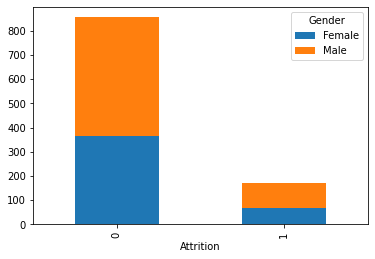

In [251]:
# Draw a stacked bar chart between Attrition and Gender 
crosstable2 = pd.crosstab(df['Attrition'],df['Gender'])
crosstable2.plot(kind='bar',stacked=True)


### Visualize the ```df``` by drawing the following histogram:

* Draw a histogram of ```TotalWorkingYears``` with 30 bins. 
* Draw a histogram of ```YearsAtCompany``` with 30 bins and find whether the values in ```YearsAtCompany``` are skewed. 

1.7724925350968725
Right Skewed


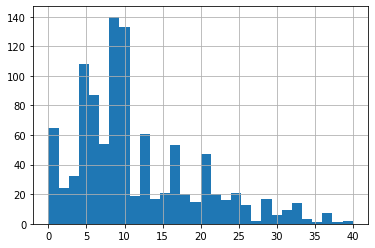

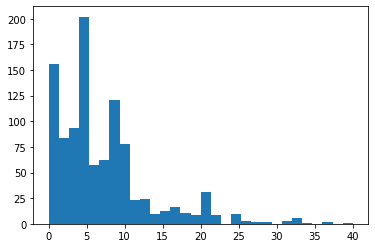

In [252]:
# Draw a histogram of TotalWorkingYears with 30 bins
df['TotalWorkingYears'].hist(bins=30)


# Draw a histogram of YearsAtCompany
fig2 = plt.figure()
fig2 = fig2.add_subplot('111')
fig2.hist(df['YearsAtCompany'],bins=30)
fig2

skew_value = df['YearsAtCompany'].skew(axis = 0, skipna = True)
print(skew_value)
if skew_value >= 0.8 :
  print('Right Skewed')
elif skew_value <= 0.3 :
  print('Left Skewed')
else:
  print('Not Skewed')


### Visualize the ```df``` by drawing the following boxplot:

* Draw a boxplot of ```MonthlyIncome``` for each ```Department``` and report whether there is/are outlier(s). 


In  Sales Outlier Present
In  Research & Development Outlier Present
In  Human Resources Outlier Not Present


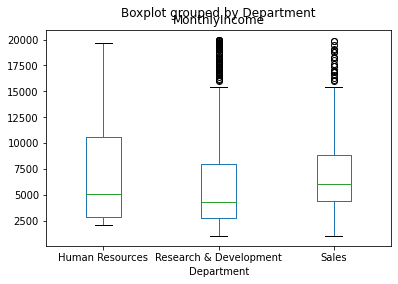

In [253]:
# Draw a boxplot of MonthlyIncome for each Department and report outliers 
df.boxplot(by ='Department', column =['MonthlyIncome'], grid = False)

deptlist = df['Department'].unique()
deptdata = df.groupby('Department')
for i1 in deptlist:
  temp1 = deptdata.get_group(i1)
  q1 = temp1['MonthlyIncome'].quantile(q=0.25)
  q3 = temp1['MonthlyIncome'].quantile(q=0.75)
  iqr = q3 - q1
  lb = q1 - 1.5 * iqr
  ub = q3 + 1.5 * iqr
  if ub < temp1['MonthlyIncome'].max() or lb > temp1['MonthlyIncome'].min():
    print('In ',i1,'Outlier Present')
  else :
    print('In ',i1,'Outlier Not Present')

### Visualize the ```df``` by drawing the following piechart:

* Create a pie chart of the values in ```JobRole``` with suitable label and report which role has highest number of persons. 

 Sales Executive has highest number of persons


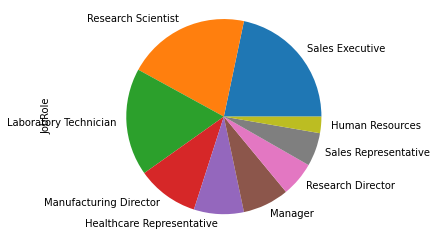

In [254]:
# Create a piechart of JobRole 
# You will need to find the counts of unique values in JobRole. 
df.JobRole.value_counts().plot(kind='pie')
plt.axis('equal')

df1 = df.groupby(['JobRole'])['EmployeeNumber'].nunique().groupby(level=0).max().reset_index(name='Max')
df1.sort_values("Max", axis = 0, ascending = False,inplace = True, na_position ='last')
data4 = df1.head(1)['JobRole'].to_string(index=False)
print(data4,'has highest number of persons')
